In [1]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import numpy as np
import curve_fitting as cf
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMMtoHH as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf
import generalized_genSim_shorten_time as ggsd
import eval_helper_na12mut8st as ehn
import general_plotter

Reached import hoc
Reached import neuron.hoc


In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['act', 'inact'])


#evaluator = vcl_ev.Vclamp_evaluator_HMM('./param_stats_narrow.csv', 'A427D', 'na', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

In [3]:
evaluator.wild_data

{'v_half_act': -24.766773952561557,
 'gv_slope': 6.182889403924417,
 'v_half_ssi': -54.87286864766194,
 'ssi_slope': 7.0587721575219105,
 'tau_fast': 0.5965574338456944,
 'tau_slow': 1.1909070676269988,
 'percent_fast': 0.010914235924136428,
 'tau0': 0.4231792451831216,
 'peak_amp': -0.29202235337531235,
 'time_to_peak': 5.20000000000004}

In [4]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    if halloffame is not None:
        halloffame.update(population)
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)

In [5]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=50, hof = hof, map_function=pool.map)  # CHANGE offspring_size

cp_file = './cp.pkl'

In [6]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=cp_file)  # CHANGE max_ngen
end_time = time.time()
print(end_time - start_time)

TypeError: not assignable

In [9]:
print(log)

gen	nevals	avg        	std        	min    	max        
1  	100   	5.19614e+06	1.34421e+07	6.34705	3.99701e+07
2  	100   	4.5966e+06 	1.27513e+07	6.34705	3.99701e+07
3  	100   	7.99405e+06	1.5988e+07 	4.41338	3.9971e+07 
4  	100   	4.99628e+06	1.32188e+07	4.15451	3.99701e+07
5  	100   	3.99703e+06	1.1991e+07 	4.14903	3.99701e+07
6  	100   	3.59733e+06	1.14387e+07	4.14903	3.99701e+07
7  	100   	3.3975e+06 	1.11469e+07	4.14903	3.99701e+07
8  	100   	2.39824e+06	9.49237e+06	4.14903	3.9971e+07 
9  	100   	2.19839e+06	9.11237e+06	4.14903	3.99701e+07
10 	100   	1.59887e+06	7.83251e+06	4.14333	3.9971e+07 


In [10]:
evaluator.evaluate_with_lists(best_indvs[-1])

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.7580488599289399, 3.3852833099498545]

In [ ]:
evaluator.evaluate_with_lists([69.69213916785645, 0.8322561384849374, 0.053318071529531635, 4.7405530287730535, 1156.933892882868, 0.8699324501197686, 41.409279270907604, 5.995497534908334, 441.8443377750559, 0.31111050755712066, 25.87604508307024, 0.1425245677420343, 66.13687528939371, 10.019795971029497, 2.1760991677578785, 0.02351699603160466, 707.5482094497809, 1.2037138605843256, 16.740391631625133, 19.134382730889705])

In [19]:
import eval_helper as eh
eh.change_params(best_indvs[-1], scaled=False, is_HMM=True)

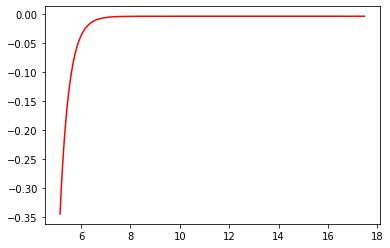

0.3669474943116727

In [20]:
ehn.find_tau0(make_plot=True)

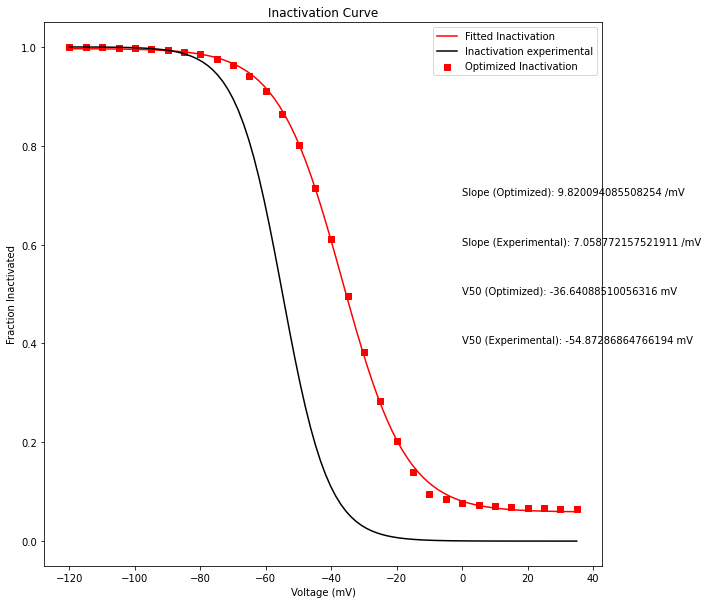

In [33]:
evaluator.plot_inact([69.69213916785645, 0.8322561384849374, 0.053318071529531635, 4.7405530287730535, 1156.933892882868, 0.8699324501197686, 41.409279270907604, 5.995497534908334, 441.8443377750559, 0.31111050755712066, 25.87604508307024, 0.1425245677420343, 66.13687528939371, 10.019795971029497, 2.1760991677578785, 0.02351699603160466, 707.5482094497809, 1.2037138605843256, 16.740391631625133, 30.134382730889705, 8000])

soma2(0.1)
soma2(0.3)
soma2(0.5)
soma2(0.7)
soma2(0.9)


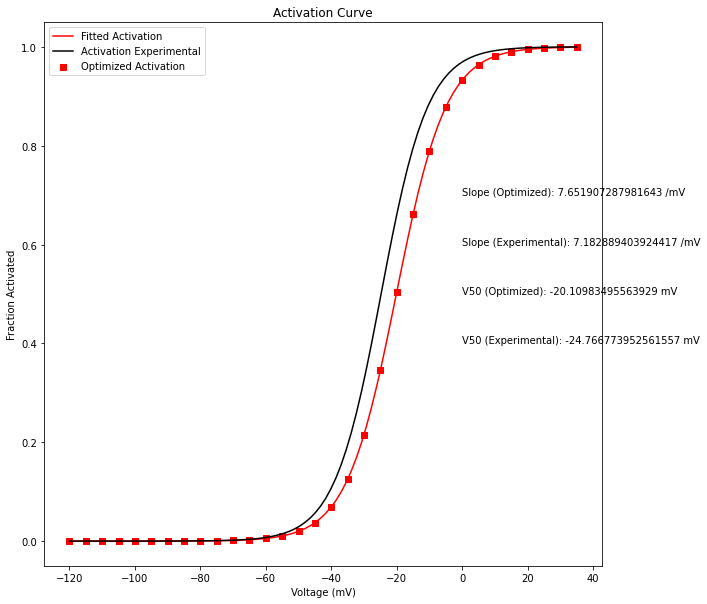

In [6]:
evaluator.plot_act([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16.740391631625133, 19.134382730889705, 8000])

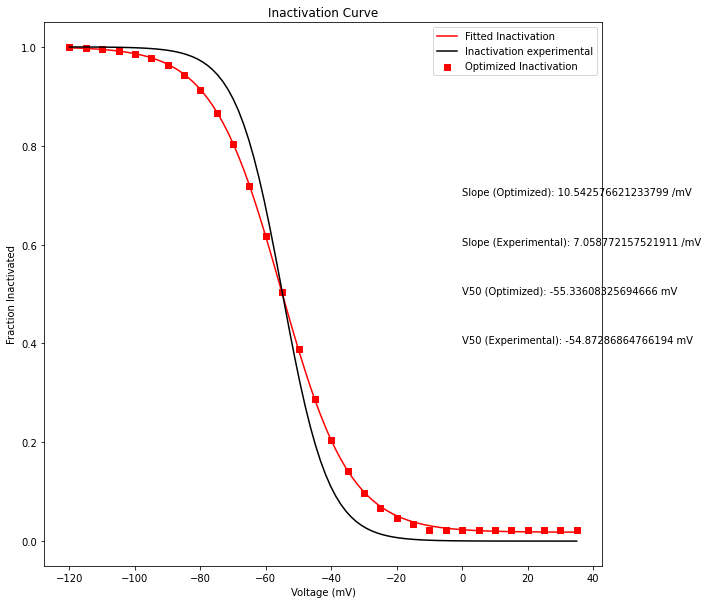

In [23]:
evaluator.plot_inact(best_indvs[-1])

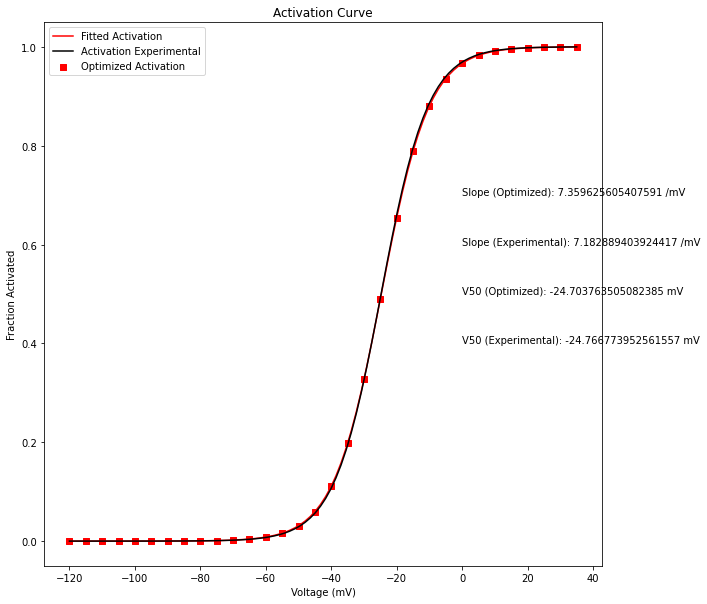

In [22]:
evaluator.plot_act(best_indvs[-1])

In [24]:
best_indvs[-1]

[2.420672028170904,
 1.1928623262939726,
 0.2987697628846588,
 3.771114804863382,
 1596.0995851831183,
 0.5550227328609832,
 29.168719008037726,
 5.310742042005109,
 360.93604409121144,
 0.7457765852697429,
 16.525211493537224,
 0.49647160581432676,
 147.6746679204907,
 8.677350228650782,
 0.29947180931369444,
 1.2253373179233198,
 1590.404220400243,
 1.2712764686966476,
 13.013916152223038,
 14.189939860486959,
 374774.9610944485]

In [ ]:
import eval_helper_na12mut as ehn
import eval_helper_na12mut8st as ehn8

In [ ]:
ehn.find_time_to_peak()

In [ ]:
ehn8.find_time_to_peak()

In [2]:
na12mut_params = [8, -30, 7.2, 0.4, 0.124, -45, -45, 0.5, 1.5, 0.02, 0.01, 2, 0.01, .03, -45, 7, -60, 0.0003, 12, 0.2, 10, -58, 2, 55]

In [3]:
opt_HMM_params = [7.469160595102233, 0.1110309461516207, 0.09834011757279898, 1.959729160651832, 1491.0890579477725, 0.9777458769346035, 45.97790651811909, 4.882721940602804, 242.65899105292436, 2.5542201851262116, 3.09332385731855, 0.3596166292564826, 175.64752705910956, 13.719069975558211, 1.4023566772303253, 0.14909624523920945, 2158.0900150490675, 0.4841273939654566, 21.95876324483144, 16.98204089057011]

ValueError: argument not a density mechanism name.

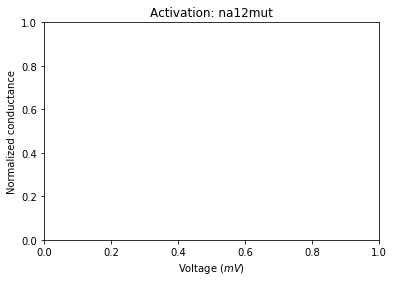

In [4]:
general_plotter.plot_act(na12mut_params, 'na12mut', False, opt_HMM_params, 'na12mut8st', True, './test.pdf', 'na12mut')